In [5]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats
import statsmodels.api as sm

import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

# The Poisson distribution

Discrete distribution that models event counts or arrivals with a fixed rate $\mu$

* Arrivals independent of each other

## Probability mass function

Let $X$ be the random variable that is the number of counts or arrivals

\begin{equation}
    f_X(k; \mu) = e^{-\mu} \frac{\mu^k}{k!} \hspace{2cm} k \in \{0,1,2,\dots\}
    \label{eq:pmf}
\end{equation}

Expectation and variance: 

Observe that

$$
\sum_{k=0}^{\infty} k \frac{\mu^k}{k!} 
= \sum_{k=1}^{\infty} k \frac{ \mu \mu^{k-1}}{k (k-1)!} 
= \mu \sum_{k=1}^{\infty} \frac{\mu^{k-1}}{(k-1)!} = \mu \sum_{j=0}^{\infty} \frac{ \mu^{j}}{j!} = \mu e^{\mu}
$$
and
$$
\sum_{k=0}^{\infty} k^2 \frac{\mu^k}{k!} 
 = \mu \sum_{k=1}^{\infty} k \frac{\mu^{k-1}}{(k-1)!}
 = \mu \sum_{j=0}^{\infty} (j+1) \frac{ \mu^{j}}{j!}
 = \mu \left (\sum_{j=0}^{\infty} j \frac{ \mu^{j}}{j!} + \sum_{j=0}^{\infty}\frac{ \mu^{j}}{j!} \right )
 = \mu (\mu e^\mu + e^\mu)
 = e^{\mu}(\mu^2 + \mu)
$$

We get

$$ 
\mu_X = e^{-\mu} \sum_{k=0}^{\infty} k \frac{\mu^k}{k!} = e^{-\mu} \mu e^{\mu} = \mu
$$

$$
\sigma^2_X = \left [e^{-\mu} \sum_{k=0}^{\infty} k^2 \frac{\mu^k}{k!} \right ] - \mu_X^2
           = \left [e^{-\mu} e^{\mu}(\mu^2 + \mu)\right ] - \mu^2
           = \mu^2 + \mu -\mu^2 = \mu
$$

Moment generating function:
$$
M_X(t) = E(e^{tX}) = e^{-\lambda}\sum_{k=0}^{\infty} e^{tk} \frac{\lambda^k}{k!} = e^{-\lambda}\sum_{k=0}^{\infty} \frac{(\lambda e^t)^k}{k!} = e^{-\lambda} e^{\lambda e^t} = e^{\lambda(e^t-1)}
$$

<IPython.core.display.Javascript object>


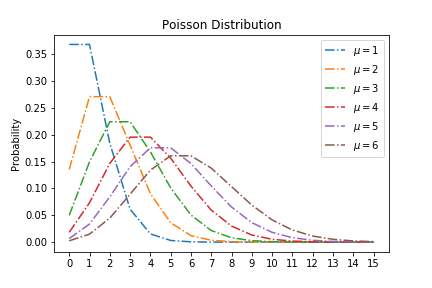

In [6]:
# Poisson 

fig = plt.figure

k = np.arange(16)        # Number of events: {0,1,2 ...}

# We want to plot multiple lines in the same plot, so we call plot repeatedly in a loop.
# The function returns objects whose text representation becomes output. To suppress that,
# we assign each call to a temp variable (the _ character is a valid variable name).

for mu in np.arange(1,7):
    _ = plt.plot(k,stats.poisson.pmf(k,mu), '-.',label=r"$\mu=$"+str(mu)) 
    _ = plt.legend()


# 'set' used for setting multiple things in one call. Works only with gca(): get current axes.

_ = plt.gca().set(ylabel = "Probability", title="Poisson Distribution",xticks=k)

# Notes:
    # The Poission distribution is discrete. Lines are simply guides to the eye.
    # The peak of the pmf plot shifts towards the value of mu (average number of events) 
    # because the modes are mu and mu-1
                                                                       

## Derivation for arrivals

 Let $\lambda$ be the probability per unit time of one arrival. Consider a small interval $\delta t$, during which the probability of more than one arrival is assumed to be zero. Let $P(n,t)$ be the probability of $n$ arrivals by time $t$. Consider the probability of $n$ arrivals by time $t+\delta t$. This is the sum of two probabilities: 
1. the probability that there are $n-1$ arrivals by time $t$ and one arrival in the interval $\delta t$
2. the probability that there are $n$ arrivals by time $t$ and no arrivals during $\delta t$
 
\begin{equation}
  P(n,t+\delta t) = P(n-1,t) \lambda \delta t + P(n,t)(1-\lambda\delta t) 
 \label{eq:Recur}
\end{equation}

Rearranging equation (\ref{eq:Recur}) and taking the limit as $\delta t \to 0$

\begin{equation}
\lim_{\delta t \to 0} \frac{P(n,t+\delta t)-P(n,t)}{\delta t} = \frac{d P(n,t)}{dt} = \lambda [P(n-1,t) - P(n,t)]
\end{equation}
Or,
\begin{equation}
\frac{d P(n,t)}{dt} + \lambda P(n,t) = \lambda P(n-1,t)
\end{equation}

After multiplying with $e^{\lambda t}$ this can be intergrated to give
\begin{equation}
 e^{\lambda t} P(n,t) = \lambda \int_0^t e^{\lambda t'} P(n-1,t')\ dt'
 \label{eq:int_sol}
\end{equation}

This is a recurrence relation, so we have to start with $P(0,t)$. Thinking about the reasoning behind equation (\ref{eq:Recur}), we see that

$$ P(0,t+\delta t) = P(0,t)(1-\lambda\delta t)$$
which implies
$$\frac{d P(0,t)}{dt}  = -\lambda P(0,t)$$

This has the solution
\begin{equation}
 P(0,t) = e^{-\lambda t}
\end{equation}

Substituting this into equation (\ref{eq:int_sol}) with $n=1$, we get

$$P(1,t) = e^{-\lambda t} (\lambda t)$$

Similarly, by successive substitution, we can obtain

$$ P(2,t) = e^{-\lambda t} \frac{(\lambda t)^2}{2}, \hspace{0.5cm} P(3,t) = e^{-\lambda t} \frac{(\lambda t)^3}{3\times2},  \hspace{0.5cm} P(4,t) = e^{-\lambda t} \frac{(\lambda t)^4}{4\times3\times2}$$ etc.

The general formula, which can be proved by induction, is

\begin{equation}
\boxed{
 P(n,t) = e^{-\lambda t} \frac{(\lambda t)^n}{n!} 
 }
\end{equation}

The expectation and variance are $$ \mu_X = \lambda t, \hspace{0.5 cm}\sigma^2_X = \lambda t$$


## Exponential distribution of inter-arrival times
 
Let $T_n$ be the $n$th arrival time. Let $\tau  \equiv T_{n+1} - T_n$ be the interval until the next arrival. Then, 

 $$
 \begin{split}
 P[\tau \le t]  & = 1 - P[\tau > t] \\
     & = 1 - \textrm{Probability of zero arrivals in the interval} \\
     & = 1 - P(0,t) \\
     & = 1 - e^{-\lambda t}
 \end{split}
$$

This is the cumulative distribution function which can be differentiated to get us the probability density function

$$
 f_\tau(t;\lambda) = \lambda e^{-\lambda t}
$$

This is the **exponential distribution**, with expectation and variance

$$
\begin{split}
\mu_\tau & = \lambda \int_0^\infty t e^{-\lambda t} dt = \frac{1}{\lambda} \\
\sigma^2_\tau & = \left (\lambda \int_0^\infty t^2 e^{-\lambda t} dt \right )  - \mu^2_\tau
    = \frac{2}{\lambda^2} - \frac{1}{\lambda^2} = \frac{1}{\lambda^2}
\end{split}
$$